In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import generate_mock_list
import load_tools
import globals
globals.initialize_vals()

In [2]:
L = 750
n = '2e-4'

mockset1 = generate_mock_list.mock_set(L, n, As=1)
cat_tag1 = mockset1.cat_tag

mockset2 = generate_mock_list.mock_set(L, n, As=2)
mockset2.add_gradient(grad_dim=1, m=1, b=0.5)
cat_tag2 = mockset2.cat_tag

In [3]:
mockset1.__dict__.keys()

dict_keys(['cat_tag', 'data_dir', 'rlzs', 'nmocks', 'ln_fn_list', 'mock_type', 'mock_fn_list', 'mock_path'])

### 'normal' (i.e. non-gradient-estimating) correlation functions

##### Lognormal (As1x)

In [4]:
# Landy-Szalay
ln_lss = np.empty((mockset1.nmocks, globals.nbins))
for i, mock_fn in enumerate(mockset1.mock_fn_list):
    xi_results = np.load(os.path.join(globals.data_dir, f'{mockset1.mock_path}/ls/{cat_tag1}/xi_ls_{globals.randmult}x_{mock_fn}.npy'), allow_pickle=True)
    r_avg = xi_results[0]
    ln_lss[i] = xi_results[1]

In [14]:
ln_ls_avg = np.mean(ln_lss, axis=0)
std_ln_ls = np.std(ln_lss, axis=0)

In [13]:
# CFE
ln_cfes = np.empty((mockset1.nmocks, globals.ncont))
for i, mock_fn in enumerate(mockset1.mock_fn_list):
    xi_results = np.load(os.path.join(globals.data_dir, f'{mockset1.mock_path}/suave/xi/bao_fixed/{cat_tag1}/xi_{mock_fn}.npy'), allow_pickle=True)
    r_cont, ln_cfes[i] = xi_results.T

In [15]:
ln_cfe_avg = np.mean(ln_cfes, axis=0)
std_ln_cfe = np.std(ln_cfes, axis=0)

In [21]:
ln_err_reg = [ln_cfe_avg-std_ln_cfe, ln_cfe_avg+std_ln_cfe]

##### Gradient (As2x)

In [6]:
# Landy-Szalay
grad_lss = np.empty((mockset2.nmocks, globals.nbins))
for i, mock_fn in enumerate(mockset2.mock_fn_list):
    xi_results = np.load(os.path.join(globals.data_dir, f'{mockset2.mock_path}/ls/{cat_tag2}/xi_ls_{globals.randmult}x_{mock_fn}.npy'), allow_pickle=True)
    r_avg = xi_results[0]
    grad_lss[i] = xi_results[1]

In [7]:
grad_ls_avg = np.mean(grad_lss, axis=0)
std_grad = np.std(grad_lss, axis=0)

In [16]:
# CFE
grad_cfes = np.empty((mockset2.nmocks, globals.ncont))
for i, mock_fn in enumerate(mockset2.mock_fn_list):
    xi_results = np.load(os.path.join(globals.data_dir, f'{mockset2.mock_path}/suave/xi/bao_fixed/{cat_tag2}/xi_{mock_fn}.npy'), allow_pickle=True)
    r_cont, grad_cfes[i] = xi_results.T

In [17]:
grad_cfe_avg = np.mean(grad_cfes, axis=0)
std_grad_cfe = np.std(grad_cfes, axis=0)

In [18]:
grad_err_reg = [grad_cfe_avg-std_grad_cfe, grad_cfe_avg+std_grad_cfe]

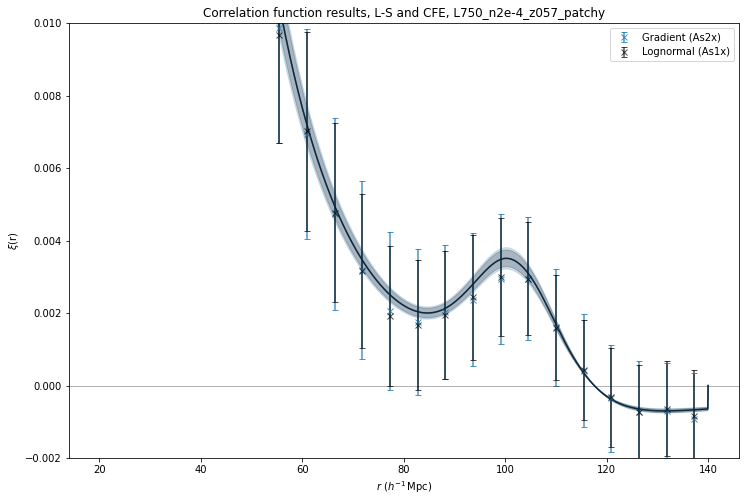

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

# params
c1 = 'k'
c2 = 'C0'
a1 = 0.2
a2 = 0.8

# CFE results
ax.fill_between(r_cont, grad_err_reg[0], grad_err_reg[1], color=c2, alpha=a1)
ax.fill_between(r_cont, ln_err_reg[0], ln_err_reg[1], color=c1, alpha=a1)
ax.plot(r_cont, grad_cfe_avg, color=c2, alpha=a2)
ax.plot(r_cont, ln_cfe_avg, color=c1, alpha=a2-0.1)

# L-S results
ax.errorbar(r_avg, grad_ls_avg, std_grad, color=c2, marker='x', ls='None', alpha=a2, capsize=3, label='Gradient (As2x)')
ax.errorbar(r_avg, ln_ls_avg, std_ln, color=c1, marker='x', ls='None', alpha=a2-0.1, capsize=3, label='Lognormal (As1x)')

ax.axhline(0, color='k', alpha=0.3, lw=1)
ax.set_ylim((-0.002,0.01))
ax.set_xlabel(r'$r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'$\xi$(r)')
ax.set_title(f"Correlation function results, L-S and CFE, {cat_tag1}")
ax.legend()